<a href="https://colab.research.google.com/github/anandaditya07/ML_LAB/blob/main/Experiment_8_Cross_Validation_and_Bias_Variance_Tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment 8 : Cross-Validation and Bias-Variance Tradeoff**

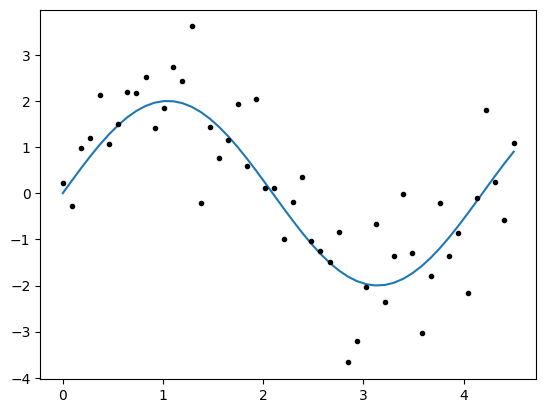

In [1]:
import numpy as np
import pylab as pl
def f(size):
    '''
    Returns a sample with 'size' instances without noise.
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5)
    return (x,y)
def sample(size):
    '''
    Returns a sample with 'size' instances.
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5) + pl.randn(x.size)
    return (x,y)
pl.clf()
f_x, f_y = f(50)
pl.plot(f_x, f_y)
x, y = sample(50)
pl.plot(x, y, 'k.')

In [2]:
# This illustrates how vander function works:
x1 = np.array([1,2,3])
print (np.vander(x1, 4))

[[ 1  1  1  1]
 [ 8  4  2  1]
 [27  9  3  1]]


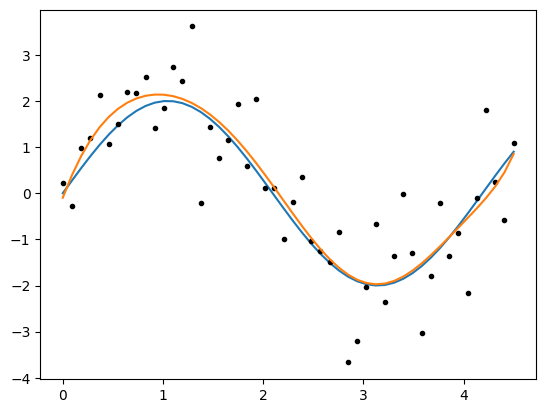

In [3]:
from sklearn.linear_model import LinearRegression
def fit_polynomial(x, y, degree):
    '''
    Fits a polynomial to the input sample.
    (x,y): input sample
    degree: polynomial degree
    '''
    model = LinearRegression()
    model.fit(np.vander(x, degree + 1), y)
    return model
def apply_polynomial(model, x):
    '''
    Evaluates a linear regression model in an input sample
    model: linear regression model
    x: input sample
    '''
    degree = model.coef_.size - 1
    y = model.predict(np.vander(x, degree + 1))
    return y
model = fit_polynomial(x, y, 8)
p_y = apply_polynomial(model, x)
pl.plot(f_x, f_y)
pl.plot(x, y, 'k.')
pl.plot(x, p_y)

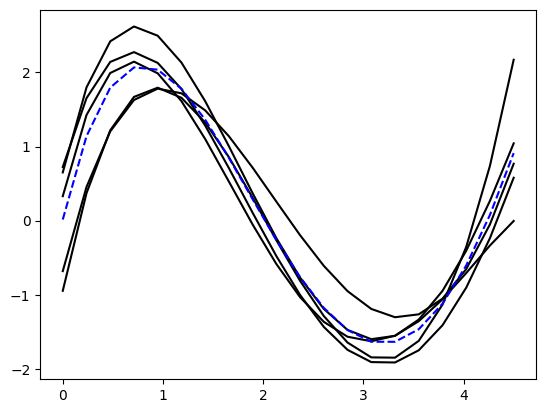

In [4]:
degree = 4
n_samples = 20
n_models = 5
avg_y = np.zeros(n_samples)
for i in range(n_models):
    (x,y) = sample(n_samples)
    model = fit_polynomial(x, y, degree)
    p_y = apply_polynomial(model, x)
    avg_y = avg_y + p_y
    pl.plot(x, p_y, 'k-')
avg_y = avg_y / n_models
pl.plot(x, avg_y, 'b--')

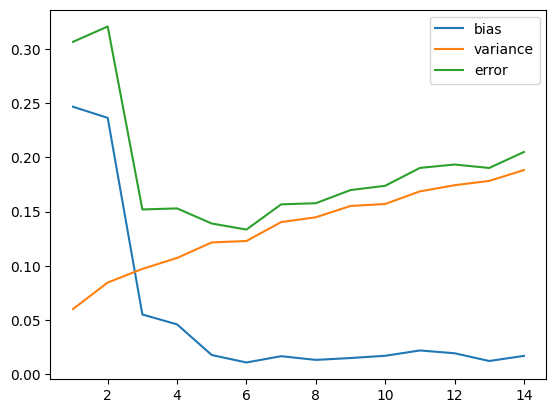

In [5]:
from numpy.linalg import norm
n_samples = 20
f_x, f_y = f(n_samples)
n_models = 100
max_degree = 15
var_vals =[]
bias_vals = []
error_vals = []
for degree in range(1, max_degree):
    avg_y = np.zeros(n_samples)
    models = []
    for i in range(n_models):
        (x,y) = sample(n_samples)
        model = fit_polynomial(x, y, degree)
        p_y = apply_polynomial(model, x)
        avg_y = avg_y + p_y
        models.append(p_y)
    avg_y = avg_y / n_models
    bias_2 = norm(avg_y - f_y)/f_y.size
    bias_vals.append(bias_2)
    variance = 0
    for p_y in models:
        variance += norm(avg_y - p_y)
    variance /= f_y.size * n_models
    var_vals.append(variance)
    error_vals.append(variance + bias_2)
pl.plot(range(1, max_degree), bias_vals, label='bias')
pl.plot(range(1, max_degree), var_vals, label='variance')
pl.plot(range(1, max_degree), error_vals, label='error')
pl.legend()

#### **Cross Validation**


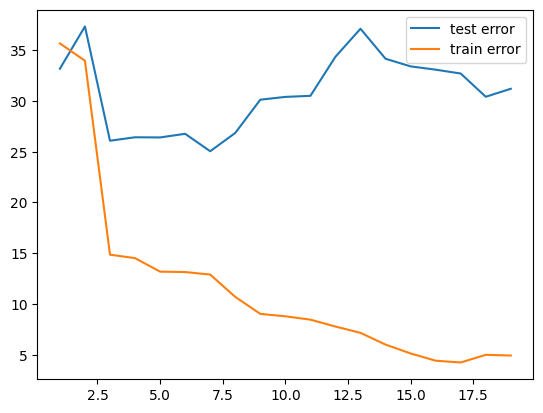

In [6]:
n_samples = 20
# train sample
train_x, train_y = sample(n_samples)
# validation sample
test_x, test_y = sample(n_samples)
max_degree = 20
test_error_vals = []
train_error_vals = []
for degree in range(1, max_degree):
    model = fit_polynomial(train_x, train_y, degree)
    p_y = apply_polynomial(model, train_x)
    train_error_vals.append(pl.norm(train_y - p_y)**2)
    p_y = apply_polynomial(model, test_x)
    test_error_vals.append(pl.norm(test_y - p_y)**2)
pl.plot(range(1, max_degree), test_error_vals, label='test error')
pl.plot(range(1, max_degree), train_error_vals, label='train error')
pl.legend()

#### **Regularization**


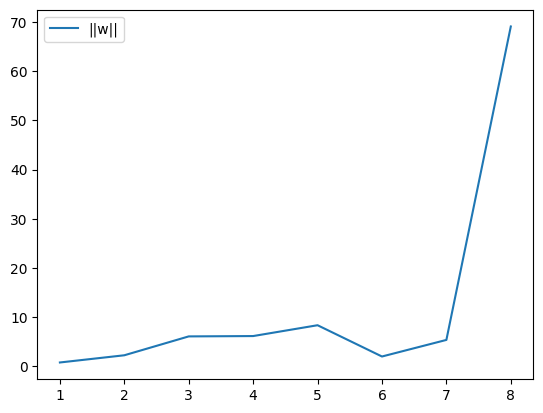

In [7]:
n_samples = 20
train_x, train_y = sample(n_samples)
max_degree = 9
w_norm = []
for degree in range(1, max_degree):
    model = fit_polynomial(train_x, train_y, degree)
    w_norm.append(pl.norm(model.coef_))
pl.plot(range(1, max_degree), w_norm, label='||w||')
pl.legend()